# Clasificador de vinos 
En el siguiente notebook se pretende contruir un clasificador de vinos usando deep learning. La idea es construir una red neuronal que sea capaz de clasificar vinos en tres grupos diferentes.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

In [2]:
# Importamos el dataset de vinos

data = load_wine()

# Dividimos los datos en características y etiquetas
X = data.data
y = data.target

print("Características:", X.shape)
print("Etiquetas:", y.shape)
print("Clases:", np.unique(y))

Características: (178, 13)
Etiquetas: (178,)
Clases: [0 1 2]


In [3]:
# Exploración rápida del dataset
print("Número de muestras:", X.shape[0])
print("Número de características:", X.shape[1])
print("Características del dataset:", data.feature_names)

Número de muestras: 178
Número de características: 13
Características del dataset: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
print("Primeras 5 muestras de X:\n", X[:5])
print("\nPrimeras 5 etiquetas:\n", y[:5])

Primeras 5 muestras de X:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Primeras 5 etiquetas:
 [0 0 0 0 0]


In [5]:
# Usamos pandas para hacer un mejor análisis exploratorio
df = pd.DataFrame(X, columns=data.feature_names)
df['class'] = y

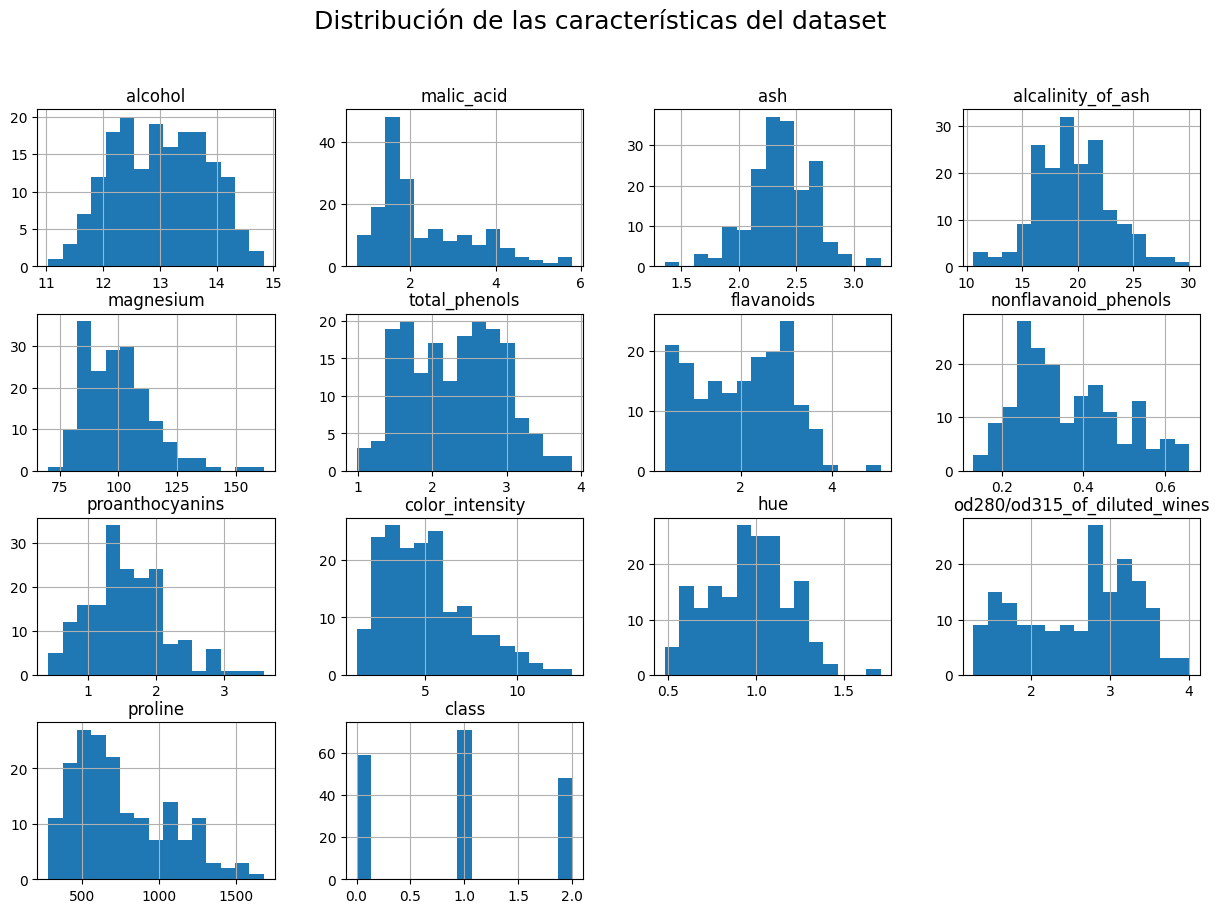

In [6]:
# Histograma de cada característica
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Distribución de las características del dataset", fontsize=18)
plt.show()

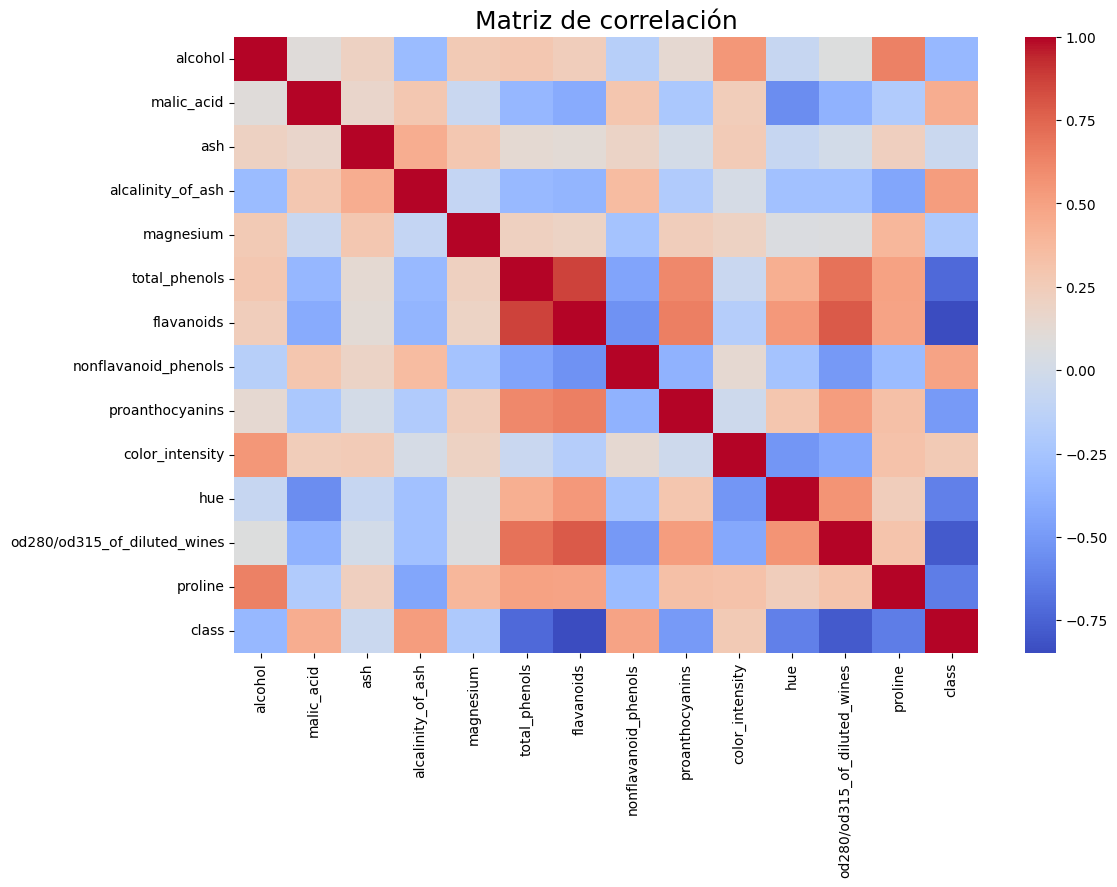

In [7]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación", fontsize=18)
plt.show()

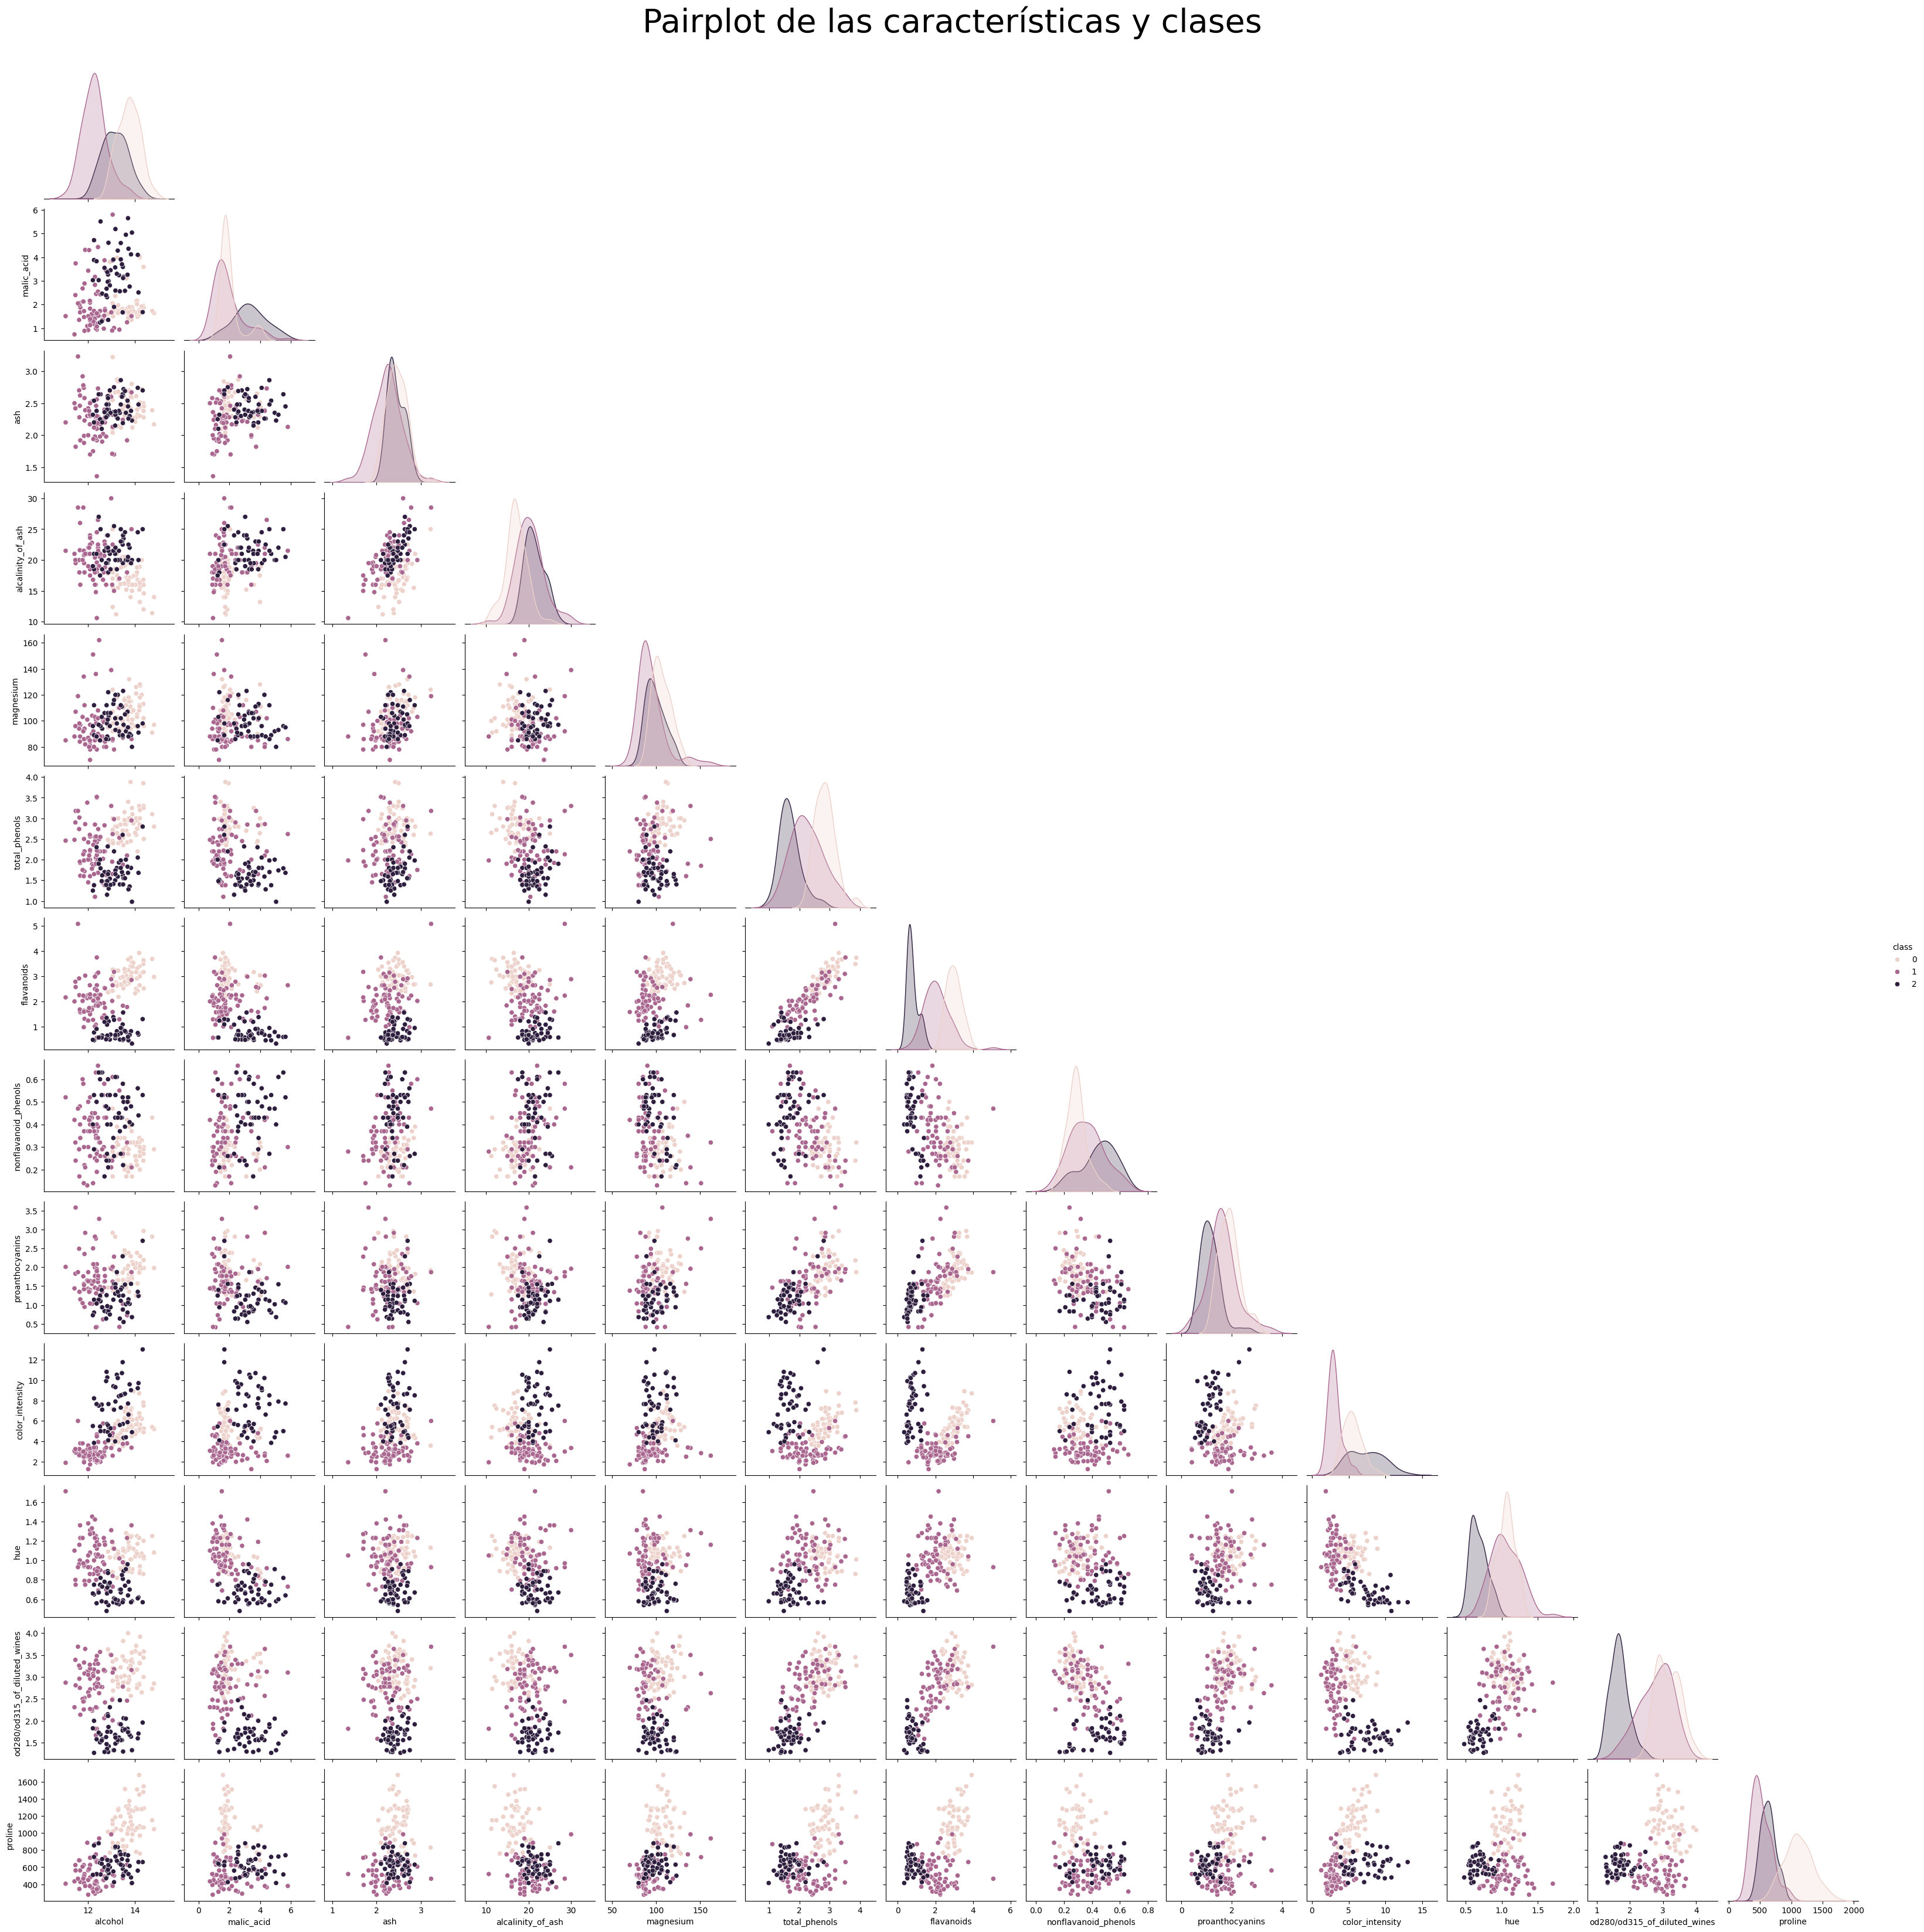

In [8]:
# Gráfico de pares 
sns.pairplot(df, hue='class', diag_kind='kde', corner=True)
plt.suptitle("Pairplot de las características y clases", y=1.02, fontsize=40)
plt.show()

In [9]:
# Dividimos el dataset en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% de los datos para test
    random_state=42,  # para reproducibilidad
    stratify=y        # mantiene proporción de clases
)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (142, 13)
Tamaño del conjunto de prueba: (36, 13)


In [10]:
# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajustar el escalador SOLO con datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Transformar los datos de prueba usando el escalador entrenado

print("Primeras 5 muestras escaladas de X_train:\n", X_train_scaled[:3])
print("\n Primeras 5 muestras escaladas de X_test:\n", X_test_scaled[:3])


Primeras 5 muestras escaladas de X_train:
 [[ 0.38580089 -0.63787118  1.77666817 -1.22453161  0.69643032  0.52686525
   0.73229212 -0.1695489  -0.41578344 -0.16746725  0.62437819  0.2529082
   0.46772474]
 [ 0.94851892 -0.76544542  1.25317383  0.85328406  0.09178497  1.17279546
   1.33318146 -0.59045701  1.34974202  0.30530313  1.06715537  0.15104809
   1.81576773]
 [ 0.52335419 -0.51940939  0.9540342  -1.04643312 -0.44567755  0.93057163
   1.006382   -0.1695489  -0.26000178 -0.081509   -0.12834302  0.89317174
   1.51620262]]

 Primeras 5 muestras escaladas de X_test:
 [[ 1.41119819 -0.16402402 -0.24252429 -0.48245458  0.36051624  1.09205418
   1.40697489 -1.17972837  1.34974202  0.32679269  1.33282168  0.82041452
   2.5646805 ]
 [-0.57707218 -1.002369   -0.42948655 -0.63086999 -0.98314008 -0.44203005
  -1.4815107   2.01917328 -0.60618325  0.19785532 -0.88106423 -1.5951252
  -0.29783054]
 [ 1.12358675 -0.4009476   1.62709836 -0.06689145  0.49488187  1.09205418
   1.03800775  0.08299597

In [11]:
# Convertir estos objetitos a tensores de PyTorch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Verificamos las dimensiones de los tensores
print("Dimensiones de X_train_tensor:", X_train_tensor.shape)
print("\nDimensiones de y_train_tensor:", y_train_tensor.shape)

print("\nEjemplo de una muestra de entrenamiento ya escalada y siendo un tensor:\n", X_train_tensor[0], type(X_train_tensor[0]))
print("\nEtiqueta correspondiente a esa muestra:", y_train_tensor[0].item())

Dimensiones de X_train_tensor: torch.Size([142, 13])

Dimensiones de y_train_tensor: torch.Size([142])

Ejemplo de una muestra de entrenamiento ya escalada y siendo un tensor:
 tensor([ 0.3858, -0.6379,  1.7767, -1.2245,  0.6964,  0.5269,  0.7323, -0.1695,
        -0.4158, -0.1675,  0.6244,  0.2529,  0.4677]) <class 'torch.Tensor'>

Etiqueta correspondiente a esa muestra: 0


In [12]:
# Crear la clase de la red neuronal: MLP clásico de 3 capas (dos ocultas con ReLU y una de salida)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.model(x)
    

In [13]:
# Elejimos los hiperparámetros
input_size = X_train_tensor.shape[1]  
hidden_size = 64  
output_size = len(np.unique(y))  
learning_rate = 0.01
num_epochs = 100
print("Número de características de entrada:", input_size)
print("Tamaño de la capa oculta:", hidden_size)
print("Número de clases de salida:", output_size)
print("Tasa de aprendizaje:", learning_rate)
print("Número de épocas:", num_epochs)

Número de características de entrada: 13
Tamaño de la capa oculta: 64
Número de clases de salida: 3
Tasa de aprendizaje: 0.01
Número de épocas: 100


In [14]:
# Instanciar la red
model = MLP(input_size, hidden_size, output_size)
print("Modelo creado:", model)

Modelo creado: MLP(
  (model): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)


In [15]:
# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print("Función de pérdida:", criterion)
print("Optimizador:", optimizer)

Función de pérdida: CrossEntropyLoss()
Optimizador: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [16]:
# Bucle de entrenamiento

train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()  # Modo entrenamiento
    optimizer.zero_grad()  # Limpiar gradientes

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass y optimización
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validación
    model.eval()  # Modo evaluación
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    # Mostrar cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch + 1}/{num_epochs}], Pérdida de entrenamiento: {loss.item():.4f}, Pérdida de validación: {val_loss.item():.4f}")

Época [10/100], Pérdida de entrenamiento: 0.0454, Pérdida de validación: 0.0964
Época [20/100], Pérdida de entrenamiento: 0.0002, Pérdida de validación: 0.1725
Época [30/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1396
Época [40/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1347
Época [50/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1358
Época [60/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1374
Época [70/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1389
Época [80/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1403
Época [90/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1416
Época [100/100], Pérdida de entrenamiento: 0.0000, Pérdida de validación: 0.1428


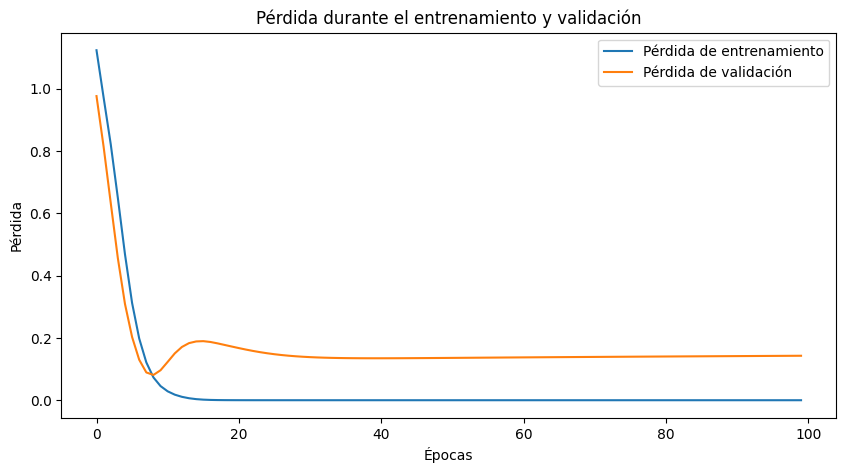

In [17]:
# Graficar las pérdidas de entrenamiento y validación
plt.figure(figsize=(10, 5)) 
plt.plot(train_losses, label='Pérdida de entrenamiento')
plt.plot(val_losses, label='Pérdida de validación') 
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento y validación')
plt.legend()
plt.show()

In [18]:
# Evaluar el modelo en el conjunto de prueba
model.eval()  # Modo evaluación
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de prueba: 97.22%


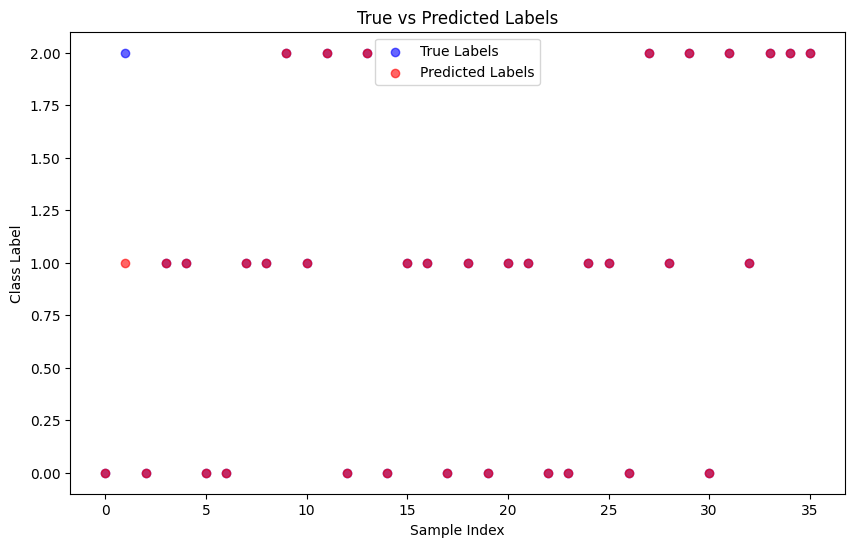

In [19]:
# Mostrar el performance del modelo
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="True Labels", color='blue', alpha=0.6)
plt.scatter(range(len(predicted)), predicted, label="Predicted Labels", color='red', alpha=0.6)
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()